In [1]:
import pickle
import numpy as np
import pandas as pd
from langchain_core.tools import tool
from keras.saving import load_model
from pydantic import BaseModel, Field, validator
from langchain_core.messages import HumanMessage

from langchain_core.runnables.graph import MermaidDrawMethod
from IPython.display import display, Image


### Funzione di Predizione del Rischio di Ictus e Modello ML
In questa cella, viene creata una funzione `get_stroke_risk` che utilizza un modello di machine learning per prevedere il rischio di ictus basandosi su dati personali e di salute. La funzione accetta un insieme di variabili (come età, sesso, livello di glucosio medio, BMI, ecc.) e restituisce una predizione binaria (0 o 1) sul rischio di ictus.

<a href="https://python.langchain.com/v0.2/api_reference/core/tools/langchain_core.tools.convert.tool.html#tool">tool documentation</a>

#### Dettagli del Codice:
- **Modello Pydantic**: La classe `DataRow` definisce i campi di input con descrizioni dettagliate per assicurare che i dati siano strutturati correttamente.
- **Funzione Decorata con `@tool`**: La funzione `get_stroke_risk` è decorata con `@tool` per poter essere usata come strumento all'interno di un flusso LangChain.
- **Caricamento del Modello**: Il modello di rete neurale addestrato viene caricato con `load_model` dalla cartella `model`.
- **Predizione**: I dati di input vengono trasformati in un array `tensor` e passati al modello per ottenere la predizione, che è poi confrontata con una soglia (0.4) per generare l'output binario.

### Assignment per i Corsisti
- Analizza la funzione `get_stroke_risk` per comprendere come vengono utilizzati i dati di input per generare una predizione.
- Scrivi il codice per testare la funzione con input diversi e osserva come cambia l'output.
- Come esercizio, prova a modificare la soglia di classificazione e analizza come questa modifica influisce sulla sensibilità delle predizioni.


In [2]:
class DataRow(BaseModel):
    age: int                                 = Field(description="Your age in years")
    gender_Male: bool                        = Field(description="1 if you're a male, 0 otherwise")
    gender_Female: bool                      = Field(description="1 if you're a female, 0 otherwise")
    gender_Other: bool                       = Field(description="1 if you're not male nor female, 0 otherwise")
    hypertension: int                        = Field(description="Do you have hypertension? (0, 1)")
    heart_disease: int                       = Field(description="Do you have any heart disease? (0, 1)")
    avg_glucose_level: float                 = Field(description="Your average glucose level in mg/dL")
    bmi: int                                 = Field(description="Your Body Mass Index (BMI)")
    ever_married_No: bool                    = Field(description="0 if you've ever been married")
    ever_married_Yes: bool                   = Field(description="1 if you've ever been married")
    work_type_Govt_job: bool                 = Field(description="1 if you have a govt_job, 0 otherwise")
    work_type_Never_worked: bool             = Field(description="1 if you never worked, 0 otherwise")
    work_type_Private: bool                  = Field(description="1 if you have a private job, 0 otherwise")
    work_type_Self_employed: bool            = Field(description="1 if you have a self employed job, 0 otherwise")
    work_type_children: bool                 = Field(description="1 if you are a child, 0 otherwise")
    Residence_type_Rural: bool               = Field(description="1 if you live in a rural residence, 0 otherwise")
    Residence_type_Urban: bool               = Field(description="1 if you live in a urban residence, 0 otherwise")
    smoking_status_Unknown: bool             = Field(description="1 if your smoking status is unknown, 0 otherwise")
    smoking_status_formerly_smoked: bool     = Field(description="1 if you don't smoke anymore, 0 otherwise")
    smoking_status_never_smoked: bool        = Field(description="1 if you never smoked, 0 otherwise")
    smoking_status_smokes: bool              = Field(description="1 if you smoke, 0 otherwise")

@tool
def get_weather(location: str):
    """Returns the current weather for the given location."""
    if location.lower() in ["sf", "san francisco"]:
        return "It's 60 degrees and foggy."
    else:
        return "It's 90 degrees and sunny."

# @tool("get_stroke_risk", args_schema=DataRow, return_direct=True)
@tool("get_stroke_risk", return_direct=True)
def get_stroke_risk(
    age: int,
    gender_Male: bool,
    gender_Female: bool,
    gender_Other: bool,
    hypertension: int,
    heart_disease: int,
    avg_glucose_level: float,
    bmi: int,
    ever_married_No: bool,
    ever_married_Yes: bool,
    work_type_Govt_job: bool,
    work_type_Never_worked: bool,
    work_type_Private: bool,
    work_type_Self_employed: bool,
    work_type_children: bool,
    Residence_type_Rural: bool,
    Residence_type_Urban: bool,
    smoking_status_Unknown: bool,
    smoking_status_formerly_smoked: bool,
    smoking_status_never_smoked: bool,
    smoking_status_smokes: bool,
):
    """Loads a ML model and makes a prediction"""
    model = load_model("model/model.keras")
    print(age)
    tensor = np.array([
        age,
        gender_Male,
        gender_Female,
        gender_Other,
        hypertension,
        heart_disease,
        avg_glucose_level,
        bmi,
        ever_married_No,
        ever_married_Yes,
        work_type_Govt_job,
        work_type_Never_worked,
        work_type_Private,
        work_type_Self_employed,
        work_type_children,
        Residence_type_Rural,
        Residence_type_Urban,
        smoking_status_Unknown,
        smoking_status_formerly_smoked,
        smoking_status_never_smoked,
        smoking_status_smokes
    ])
    tensor = np.array([[54, 1, 0, 0, 1, 1, 135.4, 28, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]])
    return (model.predict(tensor) > 0.4).astype(int)

In [3]:
# Invochiamo il tool

get_stroke_risk.invoke({
    "age": 54,
    "gender_Male": 1,
    "gender_Female": 0,
    "gender_Other": 0,
    "hypertension": 1,
    "heart_disease": 1,
    "avg_glucose_level": 135.4,
    "bmi": 28,
    "ever_married_No": 0,
    "ever_married_Yes": 1,
    "work_type_Govt_job": 1,
    "work_type_Never_worked": 0,
    "work_type_Private": 0,
    "work_type_Self_employed": 0,
    "work_type_children": 0,
    "Residence_type_Rural": 0,
    "Residence_type_Urban": 1,
    "smoking_status_Unknown": 0,
    "smoking_status_formerly_smoked": 0,
    "smoking_status_never_smoked": 1,
    "smoking_status_smokes": 0
})

54
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[0]])

### Integrazione degli Strumenti con ToolNode
Questa cella crea un nodo `ToolNode` utilizzando strumenti predefiniti per costruire un flusso di lavoro in LangGraph. Gli strumenti `get_weather` e `get_stroke_risk`, definiti in precedenza, vengono inseriti in un'istanza di `ToolNode`, rendendoli utilizzabili all'interno di un flusso complesso.

#### Dettagli del Codice:
- **`ToolNode`**: Un oggetto di LangGraph che permette di collegare e gestire strumenti all'interno di un flusso di esecuzione.
- **Lista di Strumenti**: La variabile `tools` contiene una lista degli strumenti definiti (`get_weather` e `get_stroke_risk`), che vengono passati a `ToolNode` per essere gestiti come parte del grafo.

### Assignment per i Corsisti
- Crea un `ToolNode` con una lista di strumenti personalizzati e osserva come viene gestito nel flusso di lavoro.
- Testa l'uso di `ToolNode` in una sequenza di esecuzione e verifica che gli strumenti funzionino correttamente.
- Come esercizio, prova ad aggiungere altri strumenti alla lista e analizza come questi influenzano l'output complessivo.


In [4]:
# Try other tools!
# from langchain_community.tools.tavily_search import TavilySearchResults
# from langchain_community.tools import WikipediaQueryRun
# from langchain_community.utilities import WikipediaAPIWrapper


from langgraph.prebuilt import ToolNode

tools = [get_weather, get_stroke_risk]
tool_node = ToolNode(tools)

In [5]:
from langchain_openai import ChatOpenAI  # pip install langchain-openai

llm = ChatOpenAI(
    openai_api_key="HERE YOUR OPENAI API KEY", 
    temperature=.75, 
    max_tokens=1024, 
    request_timeout=30
).bind_tools(tools)

In [6]:
from typing import Literal

from langgraph.graph import StateGraph, MessagesState, START, END
from langgraph.checkpoint.memory import MemorySaver


def should_continue(state: MessagesState) -> Literal["tools", "__end__"]:
    messages = state["messages"]
    last_message = messages[-1]
    if last_message.tool_calls:
        return "tools"
    return END


def call_model(state: MessagesState):
    messages = state["messages"]
    response = llm.invoke(messages)
    return {"messages": [response]}


workflow = StateGraph(MessagesState)

# Define the two nodes we will cycle between
workflow.add_node("agent", call_model)
workflow.add_node("tools", tool_node)

workflow.add_edge(START, "agent")
workflow.add_conditional_edges("agent", should_continue, ["tools", END])
workflow.add_edge("tools", "agent")

memory = MemorySaver()
app = workflow.compile(checkpointer=memory)

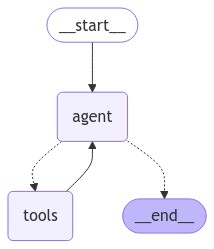

In [7]:
display(
    Image(
        app.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [8]:
# example with a single tool call
for chunk in app.stream(
    {"messages": [("human", "what's the weather in sf?")]}, stream_mode="values", config={"configurable": {"thread_id": "1"}}
):
    chunk["messages"][-1].pretty_print()

================================ Human Message =================================

what's the weather in sf?
================================== Ai Message ==================================
Tool Calls:
  get_weather (call_WbCMoJ6Xao3j2efBEzFRkjn9)
 Call ID: call_WbCMoJ6Xao3j2efBEzFRkjn9
  Args:
    location: San Francisco
================================= Tool Message =================================
Name: get_weather

It's 60 degrees and foggy.
================================== Ai Message ==================================

The weather in San Francisco is currently 60 degrees and foggy.


In [9]:
# example with a single tool call
for chunk in app.stream(
    {"messages": [("human", "Do you have any special tool?")]}, stream_mode="values", config={"configurable": {"thread_id": "1"}}
):
    chunk["messages"][-1].pretty_print()

================================ Human Message =================================

Do you have any special tool?
================================== Ai Message ==================================

Yes, I have access to various tools that can perform different functions. What specific task or information are you looking for that you need a tool for?


In [10]:
# example with a single tool call
for chunk in app.stream(
    {"messages": [("human", "i want to know if i am at risk stroke?")]}, stream_mode="values", config={"configurable": {"thread_id": "1"}}
):
    chunk["messages"][-1].pretty_print()

================================ Human Message =================================

i want to know if i am at risk stroke?
================================== Ai Message ==================================

To determine if you are at risk of stroke, I can use a tool that analyzes various factors such as age, gender, medical history, and lifestyle habits. Could you please provide me with some information such as your age, gender, medical history (hypertension, heart disease), and other relevant details? This will help me assess your stroke risk accurately.


In [11]:
# example with a single tool call
for chunk in app.stream(
    {"messages": [("human", "how can i pass the information to you?")]}, stream_mode="values", config={"configurable": {"thread_id": "1"}}
):
    chunk["messages"][-1].pretty_print()


================================ Human Message =================================

how can i pass the information to you?
================================== Ai Message ==================================

You can provide me with the necessary information by answering the following questions:

1. What is your age?
2. What is your gender (Male, Female, Other)?
3. Do you have hypertension? (Yes/No)
4. Do you have heart disease? (Yes/No)
5. What is your average glucose level?
6. What is your BMI?
7. Are you ever married? (Yes/No)
8. What is your work type (Govt job, Private, Self-employed, etc.)?
9. What is your residence type (Rural, Urban)?
10. What is your smoking status (Formerly smoked, Never smoked, Smokes, Unknown)?

Once you provide me with this information, I can use a tool to assess your risk of stroke.


In [12]:
# example with a single tool call

description = """
Alex Rivera is a seasoned professional in his mid-50s, known for his resilience and dedication to public service. Having spent years in government roles, he is well-acquainted with the intricacies of administrative work. He enjoys life in a lively urban setting, where the pace and culture match his dynamic lifestyle.

Alex's health journey includes managing certain conditions, which he handles with a proactive approach, maintaining a balanced lifestyle. Family is central to his life, and with a long-standing marriage, he finds great joy in spending time with his loved ones, especially sharing stories and wisdom with the younger generation. A non-smoker with a disciplined routine, Alex is a firm believer in nurturing well-being for himself and those around him.
"""


for chunk in app.stream(
    {"messages": [("human", description)]}, stream_mode="values", config={"configurable": {"thread_id": "1"}}
):
    chunk["messages"][-1].pretty_print()

================================ Human Message =================================


Alex Rivera is a seasoned professional in his mid-50s, known for his resilience and dedication to public service. Having spent years in government roles, he is well-acquainted with the intricacies of administrative work. He enjoys life in a lively urban setting, where the pace and culture match his dynamic lifestyle.

Alex's health journey includes managing certain conditions, which he handles with a proactive approach, maintaining a balanced lifestyle. Family is central to his life, and with a long-standing marriage, he finds great joy in spending time with his loved ones, especially sharing stories and wisdom with the younger generation. A non-smoker with a disciplined routine, Alex is a firm believer in nurturing well-being for himself and those around him.

================================== Ai Message ==================================
Tool Calls:
  get_stroke_risk (call_11vYIkQPgCmzrwTdNZZ7tak2)
 C

In [13]:
resp = app.invoke(
    {"messages": ["what's the name of the guy?"]}, 
    config={"configurable": {"thread_id": "1"}},
)

In [14]:
resp['messages'][-1].pretty_print()

================================== Ai Message ==================================

The individual in the scenario provided is named Alex Rivera.
